# Table of contents

In [1]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *

rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a, b, x):
    return a * x + b

In [3]:
a = 3.
b = 8.

In [4]:
n = 30
x = random(n)
y = lin(a, b, x)

In [5]:
x

array([ 0.0372,  0.7535,  0.2216,  0.8355,  0.9219,  0.4065,  0.91  ,  0.9996,  0.4822,  0.069 ,
        0.9264,  0.4453,  0.8118,  0.1837,  0.2623,  0.2754,  0.0844,  0.937 ,  0.898 ,  0.7451,
        0.9344,  0.6035,  0.3814,  0.3602,  0.7216,  0.511 ,  0.0957,  0.2562,  0.0099,  0.4197])

In [6]:
y

array([  8.1116,  10.2605,   8.6647,  10.5066,  10.7657,   9.2194,  10.7299,  10.9987,   9.4466,
         8.207 ,  10.7793,   9.336 ,  10.4353,   8.5511,   8.7869,   8.8263,   8.2532,  10.8109,
        10.6941,  10.2353,  10.8033,   9.8105,   9.1443,   9.0806,  10.1649,   9.5331,   8.287 ,
         8.7687,   8.0297,   9.259 ])

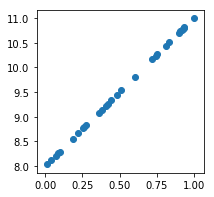

In [7]:
plt.scatter(x, y)

In [8]:
def sse(y, y_pred):
    return ((y - y_pred) ** 2).sum()

In [9]:
def loss(y, a, b, x):
    return sse(y, lin(a, b, x))

In [10]:
def avg_loss(y, a, b, x):
    return np.sqrt(loss(y, a, b, x) / n)

In [11]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

9.1566

In [12]:
lr = 0.01

In [17]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [18]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x, y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10):
        upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani